# Step 0: Imports

In [1]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import shap

# Go to project root: .../Scrabble
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)  # Add root

from src.utils import create_dataset, find_best_model, find_best_model_demo

# Step 1: Create Training+Validation/Testing sets

In [2]:
# Create new features and build one df to contains X_train_val, y_train_val and X_test 
dataset = create_dataset()

# Filter out rows of testing data (rows with user_rating == 0)
training_examples = dataset[dataset['user_rating'] != 0]

X_train_val = training_examples.drop(columns=['user_rating'])  # Traning + validation features df
y_train_val = training_examples['user_rating']  # Train + validation target vector

# Extract rows of testing data
testing_examples = dataset[dataset['user_rating'] == 0]
X_test = testing_examples.drop(columns=['user_rating']) # Test features df

# Step 2: Find the best model after tuning hyperparameters

In [3]:
best_model, avg_train_rmse, avg_val_rmse = find_best_model(X_train_val, y_train_val)

print(best_model, end='\n')
print(f"RMSE on the training set = {avg_train_rmse:.3f}", end='\n')
print(f"RMSE on the validation set = {avg_val_rmse:.3f}")

print(f"Train RMSE: {avg_train_rmse:.3f}")
print(f"Validation RMSE: {avg_val_rmse:.3f}")

gap = ((avg_val_rmse / avg_train_rmse) - 1) * 100
print(f"Generalization Gap: {gap:.3f}%")

[I 2025-05-06 09:57:58,008] A new study created in memory with name: no-name-d518d91d-5ea0-45bc-a70b-8c21c2515519



Optimizing: Random Forest


[I 2025-05-06 10:00:46,647] Trial 0 finished with value: 135.11300931567567 and parameters: {'n_estimators': 175, 'max_depth': 15, 'min_samples_split': 15}. Best is trial 0 with value: 135.11300931567567.
[I 2025-05-06 10:02:08,696] Trial 1 finished with value: 138.4396712165788 and parameters: {'n_estimators': 220, 'max_depth': 5, 'min_samples_split': 4}. Best is trial 0 with value: 135.11300931567567.
[I 2025-05-06 10:03:53,295] Trial 2 finished with value: 135.0590984087558 and parameters: {'n_estimators': 111, 'max_depth': 14, 'min_samples_split': 13}. Best is trial 2 with value: 135.0590984087558.
[I 2025-05-06 10:05:05,633] Trial 3 finished with value: 141.3361430140729 and parameters: {'n_estimators': 242, 'max_depth': 4, 'min_samples_split': 20}. Best is trial 2 with value: 135.0590984087558.
[I 2025-05-06 10:07:00,344] Trial 4 finished with value: 137.08776485293296 and parameters: {'n_estimators': 267, 'max_depth': 6, 'min_samples_split': 5}. Best is trial 2 with value: 135.0

Best score for Random Forest: 134.9215

Best params: {'n_estimators': 203, 'max_depth': 11, 'min_samples_split': 2}

Optimizing: XGBoost


[I 2025-05-06 10:17:56,062] Trial 0 finished with value: 141.30844116210938 and parameters: {'n_estimators': 175, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.7993292420985183}. Best is trial 0 with value: 141.30844116210938.
[I 2025-05-06 10:18:03,541] Trial 1 finished with value: 144.0420166015625 and parameters: {'n_estimators': 131, 'max_depth': 4, 'learning_rate': 0.012184186502221764, 'subsample': 0.9330880728874675}. Best is trial 0 with value: 141.30844116210938.
[I 2025-05-06 10:18:59,608] Trial 2 finished with value: 136.2624084472656 and parameters: {'n_estimators': 220, 'max_depth': 10, 'learning_rate': 0.010725209743171996, 'subsample': 0.9849549260809971}. Best is trial 2 with value: 136.2624084472656.
[I 2025-05-06 10:19:09,569] Trial 3 finished with value: 134.9385528564453 and parameters: {'n_estimators': 267, 'max_depth': 5, 'learning_rate': 0.01855998084649059, 'subsample': 0.5917022549267169}. Best is trial 3 with value: 134.9385528564453.
[I

Best score for XGBoost: 134.7721

Best params: {'n_estimators': 161, 'max_depth': 8, 'learning_rate': 0.04345454109729477, 'subsample': 0.645614570099021}

Optimizing: LightGBM


[I 2025-05-06 10:20:33,502] Trial 0 finished with value: 136.70529383565324 and parameters: {'n_estimators': 175, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'num_leaves': 98}. Best is trial 0 with value: 136.70529383565324.
[I 2025-05-06 10:20:41,032] Trial 1 finished with value: 143.99154658006583 and parameters: {'n_estimators': 131, 'max_depth': 4, 'learning_rate': 0.012184186502221764, 'num_leaves': 133}. Best is trial 0 with value: 136.70529383565324.
[I 2025-05-06 10:21:38,706] Trial 2 finished with value: 135.78402121498414 and parameters: {'n_estimators': 220, 'max_depth': 10, 'learning_rate': 0.010725209743171996, 'num_leaves': 147}. Best is trial 2 with value: 135.78402121498414.
[I 2025-05-06 10:21:57,423] Trial 3 finished with value: 134.967628316254 and parameters: {'n_estimators': 267, 'max_depth': 5, 'learning_rate': 0.01855998084649059, 'num_leaves': 44}. Best is trial 3 with value: 134.967628316254.
[I 2025-05-06 10:22:05,063] Trial 4 finished with value: 13

Best score for LightGBM: 134.3387

Best params: {'n_estimators': 161, 'max_depth': 8, 'learning_rate': 0.04345454109729477, 'num_leaves': 58}
           model  Mean_CV_RMSE
0       LightGBM    134.338656
1        XGBoost    134.772101
2  Random Forest    134.921494
{'Random Forest': Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['avg_word_length',
                                                   'bingo_count',
                                                   'hard_letter_plays',
                                                   'negative_turns_count',
                                                   'pass_count',
                                                   'exchange_count',
                                                   'user_score',
                                                   'avg_extra_poin

# Step 3: False Analysis

## 3.1. Evaluate Model Predictions

In [4]:
# Trains the best model
best_model.fit(X_train_val, y_train_val)

# Get predictions
y_pred = best_model.predict(X_train_val)
errors = y_train_val - y_pred
abs_errors = np.abs(errors)

# Add errors to a DataFrame
error_df = X_train_val.copy()
error_df['true'] = y_train_val
error_df['pred'] = y_pred
error_df['abs_error'] = abs_errors
error_df_sorted = error_df.sort_values(by='abs_error', ascending=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5722
[LightGBM] [Info] Number of data points in the train set: 50410, number of used features: 33
[LightGBM] [Info] Start training from score 1790.322674
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\orben\Desktop\Software Projects\Scrabble\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## 3.2. Analyze Large Errors

In [5]:
# View top 30 worst predictions
error_df_sorted.head(1000)

# Questions to ask:

# What are the biggest errors?

# Are they outliers or common cases?

# Are there patterns among high-error samples?

# What to look for:

# Any unusual or rare combinations of feature values?

# Any data entry errors or inconsistencies?

,avg_word_length,bingo_count,hard_letter_plays,negative_turns_count,pass_count,exchange_count,user_score,avg_extra_points_per_turn,lexicon,bot_score,...,norm_score_diff,word_quality_index,strategic_exchanges,efficiency_in_CSW21,efficiency_in_ECWL,efficiency_in_NSWL20,efficiency_in_NWL20,true,pred,abs_error
game_id,,,,,,,,,,,,,,,,,,,,,
37753,3.642857,0,2,0,0,0,276,13.714286,CSW21,437,...,-0.225806,275.999242,0.0,75.764498,0.0,0.0,0.000000,2510,1669.830777,840.169223
44188,3.235294,0,1,0,0,0,267,10.529412,CSW21,455,...,-0.260388,266.999175,0.0,82.527018,0.0,0.0,0.000000,2510,1673.790039,836.209961
52715,3.687500,1,0,0,0,0,350,17.250000,CSW21,385,...,-0.047619,349.999051,0.0,94.914997,0.0,0.0,0.000000,2510,1720.237575,789.762425
22940,2.923077,0,3,0,0,0,303,17.615385,CSW21,461,...,-0.206806,302.998963,0.0,103.657540,0.0,0.0,0.000000,2510,1733.932755,776.067245
16524,2.928571,0,2,0,0,0,312,16.571429,CSW21,447,...,-0.177866,311.998935,0.0,106.536222,0.0,0.0,0.000000,2510,1736.333853,773.666147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13752,4.769231,3,4,0,0,0,526,31.692308,CSW21,400,...,0.136069,525.998897,0.0,110.290091,0.0,0.0,0.000000,1712,2048.027908,336.027908
40583,4.076923,1,3,0,0,0,384,22.384615,NWL20,483,...,-0.114187,383.999058,0.0,0.000000,0.0,0.0,94.188448,2125,1789.059676,335.940324
41744,4.142857,1,4,0,0,0,368,19.142857,CSW21,325,...,0.062049,367.999112,0.0,88.827372,0.0,0.0,0.000000,1568,1903.829721,335.829721


## 3.3. Visual Diagnosis

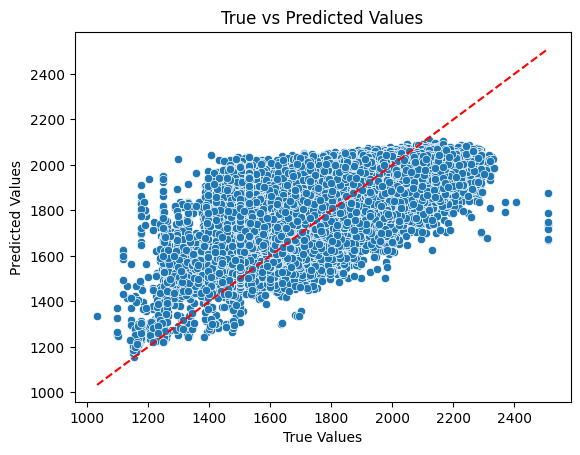

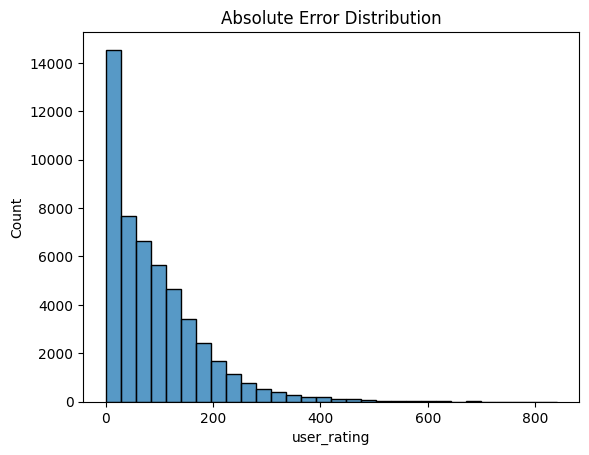

In [6]:
# Objective: Understand what input patterns confuse the model.

# Plot actual vs predicted
sns.scatterplot(x=y_train_val, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot([y_train_val.min(), y_train_val.max()], [y_train_val.min(), y_train_val.max()], 'r--')
plt.show()

# Plot error distribution
sns.histplot(abs_errors, bins=30)
plt.title('Absolute Error Distribution')
plt.show()

## 3.4. Investigate Overfitting

In [7]:
print(f"Train RMSE: {avg_train_rmse:.3f}")
print(f"Validation RMSE: {avg_val_rmse:.3f}")

gap = ((avg_val_rmse / avg_train_rmse) - 1) * 100
print(f"Generalization Gap: {gap:.3f}%")

Train RMSE: 123.730
Validation RMSE: 134.339
Generalization Gap: 8.574%


## 3.5. Identify Features That Trick the Model

100%|===================| 50396/50410 [15:14<00:00]        

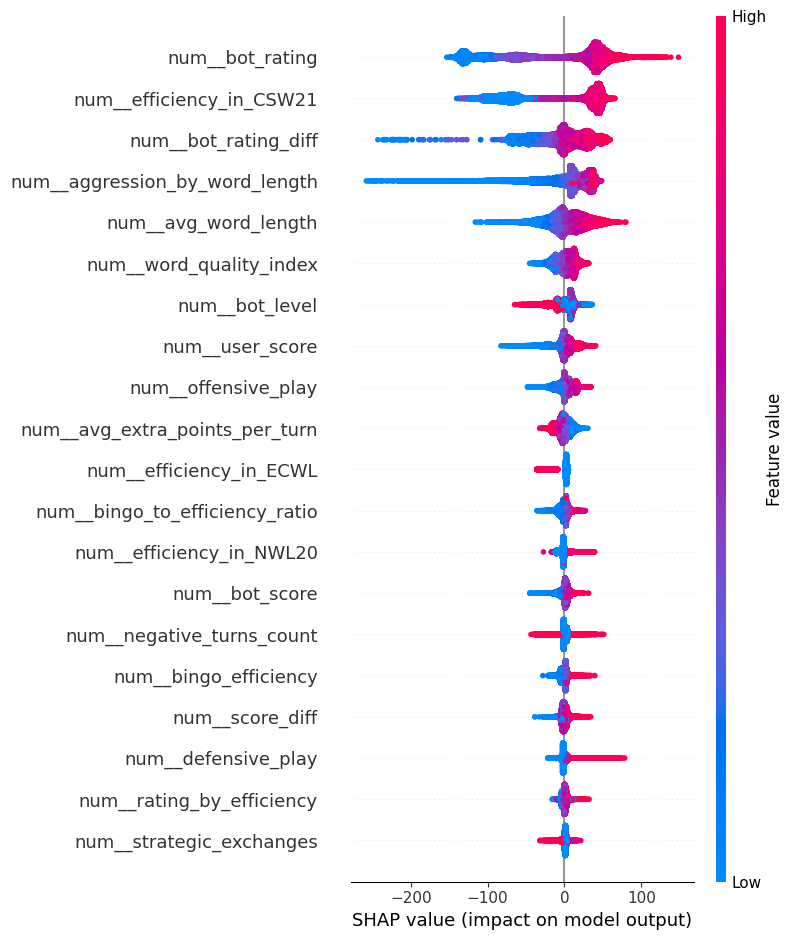

In [8]:
# Step 1: Extract the trained model and transformed data
model = best_model.named_steps['model']
X_transformed = best_model.named_steps['preprocessor'].transform(X_train_val)

# Optional: Get feature names for nicer plots
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Step 2: Use SHAP with transformed data
explainer = shap.Explainer(model, X_transformed, feature_names=feature_names)
shap_values = explainer(X_transformed, check_additivity=False)

# Step 3: Plot the summary
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)


# Questions to ask:

# Which features dominate predictions?

# Do high-error samples depend on unusual values for these features?

# Step 4: Testing the Model

In [15]:
# Get predictions
y_test = best_model.predict(X_test)

# Convert to pandas DataFrame (allows you to add column names)
predictions_df = pd.DataFrame()
predictions_df['game_id'] = X_test.index

predictions_df['rating'] = y_test
print(predictions_df)

# Save to CSV file
predictions_df.to_csv(r'C:\Users\orben\Desktop\Software Projects\Scrabble\final_predictions.csv', index=False)

       game_id       rating
0            2  1999.224592
1            7  1953.567768
2           11  1713.149116
3           14  1957.380238
4           27  2038.424748
...        ...          ...
22358    72760  2033.047163
22359    72761  1692.307037
22360    72762  1536.670866
22361    72768  2070.360718
22362    72769  1875.457638

[22363 rows x 2 columns]


C:\Users\orben\Desktop\Software Projects\Scrabble\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
